In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Load the dataset
df = pd.read_csv('/kaggle/input/best-country-to-live-in-2024/best-countries-to-live-in-2024.csv')

# Display the first few rows of the dataset
df.head()


,population_2024,population_growthRate,land_area,country,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
0,1441719852,0.00916,3287590,India,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
1,1425178782,-0.00035,9706961,China,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
2,341814420,0.00535,9372610,United States,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
3,279798049,0.00816,1904569,Indonesia,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
4,245209815,0.01964,881912,Pakistan,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516


**What is the distribution of the population across different countries in 2024?**

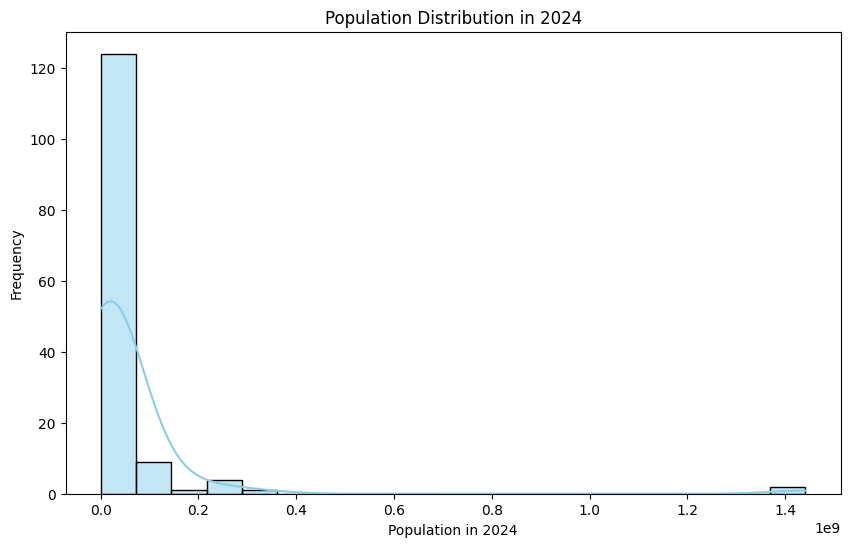

In [2]:
# Visualization using Matplotlib
plt.figure(figsize=(10, 6))
sns.histplot(df['population_2024'], bins=20, kde=True, color='skyblue')
plt.title('Population Distribution in 2024')
plt.xlabel('Population in 2024')
plt.ylabel('Frequency')
plt.show()


**How does the population growth rate vary among different countries?**

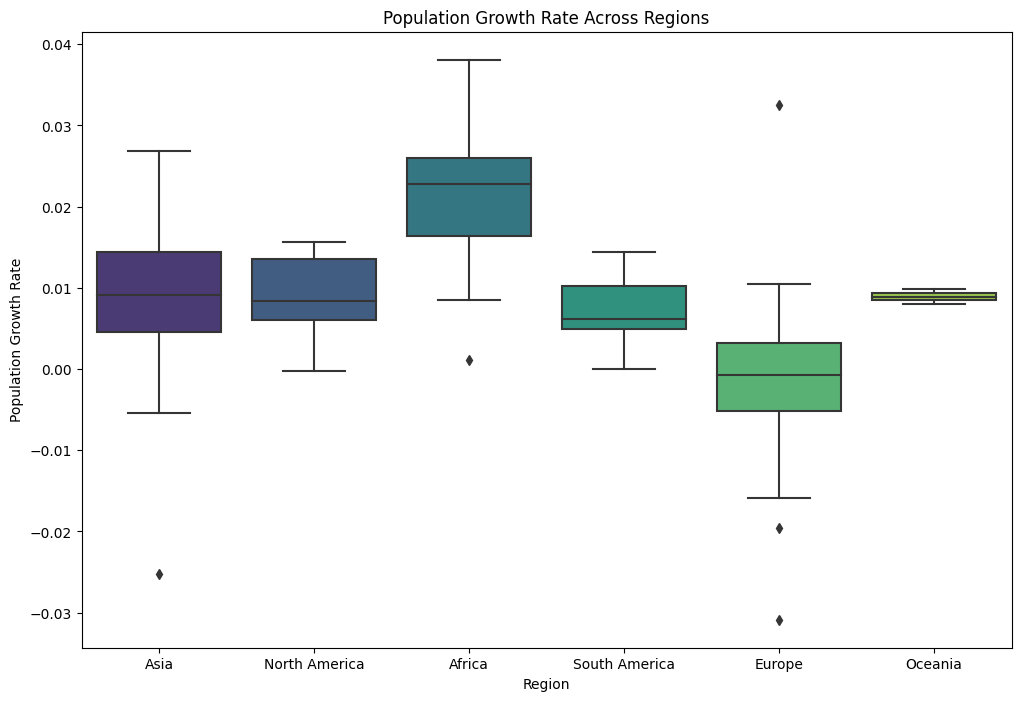

In [3]:
# Visualization using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='population_growthRate', data=df, palette='viridis')
plt.title('Population Growth Rate Across Regions')
plt.xlabel('Region')
plt.ylabel('Population Growth Rate')
plt.show()


**Is there any correlation between land area and population density?**

In [4]:
# Visualization using Plotly Express
fig = px.scatter(df, x='land_area', y='population_density', color='region', size='population_2024',
                 hover_name='country', title='Land Area vs Population Density')
fig.update_layout(xaxis_title='Land Area',
                  yaxis_title='Population Density',
                  legend_title='Region')
fig.show()


**What is the correlation between population density and the Happiness Index in 2022?**

In [5]:
# Visualization using Plotly Express (Scatter Plot)
fig = px.scatter(df, x='population_density', y='WorldHappiness2022', trendline='ols',
                 labels={'population_density': 'Population Density', 'WorldHappiness2022': 'Happiness Index'},
                 title='Correlation between Population Density and Happiness Index in 2022')
fig.show()


**What is the distribution of countries in different regions?**

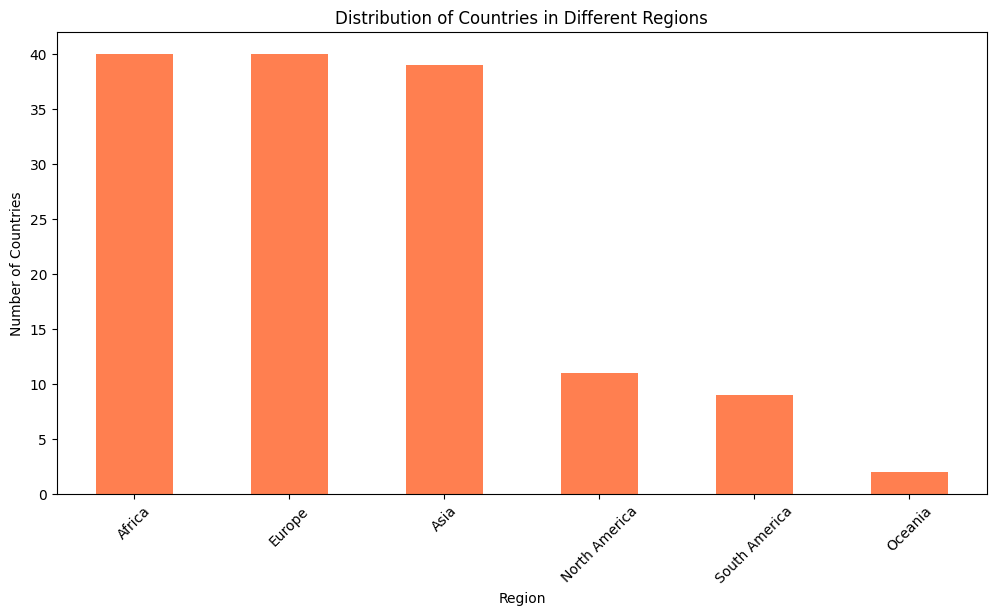

In [6]:
# Visualization using Matplotlib (Bar Chart)
region_counts = df['region'].value_counts()
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Countries in Different Regions')
plt.xlabel('Region')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.show()


**Can we visualize the top 10 countries with the highest population in 2024?**

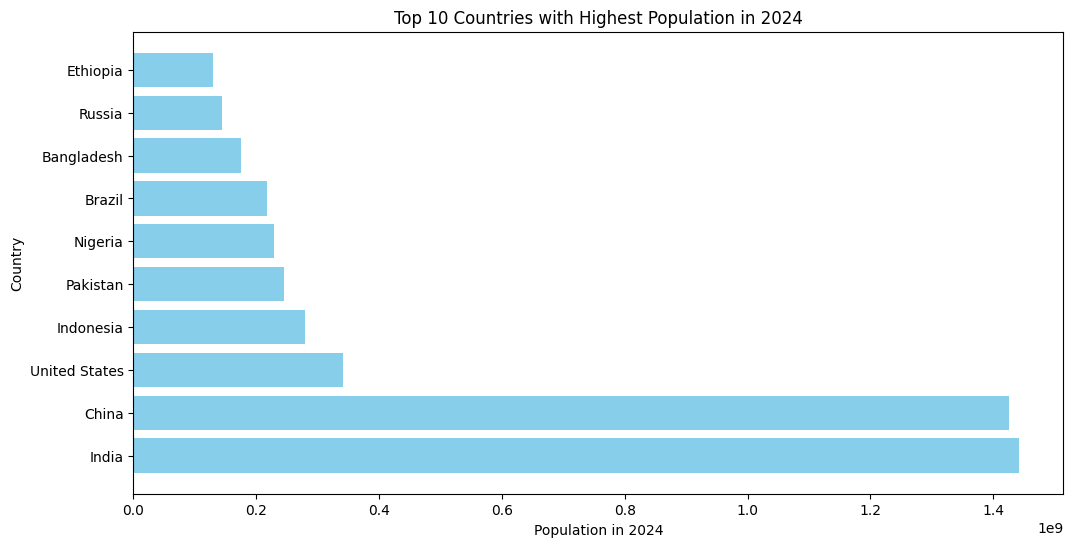

In [7]:
# Visualization using Matplotlib (Horizontal Bar Chart)
top_population_countries = df.nlargest(10, 'population_2024')
plt.figure(figsize=(12, 6))
plt.barh(top_population_countries['country'], top_population_countries['population_2024'], color='skyblue')
plt.title('Top 10 Countries with Highest Population in 2024')
plt.xlabel('Population in 2024')
plt.ylabel('Country')
plt.show()


**How is the Happiness Index distributed across different regions in 2022?**

In [8]:
# Visualization using Plotly Express (Box Plot)
fig = px.box(df, x='region', y='WorldHappiness2022', points='all',
             title='Happiness Index Distribution Across Regions in 2022')
fig.update_layout(xaxis_title='Region', yaxis_title='Happiness Index')
fig.show()


**Are there any correlations between different variables in the dataset?**

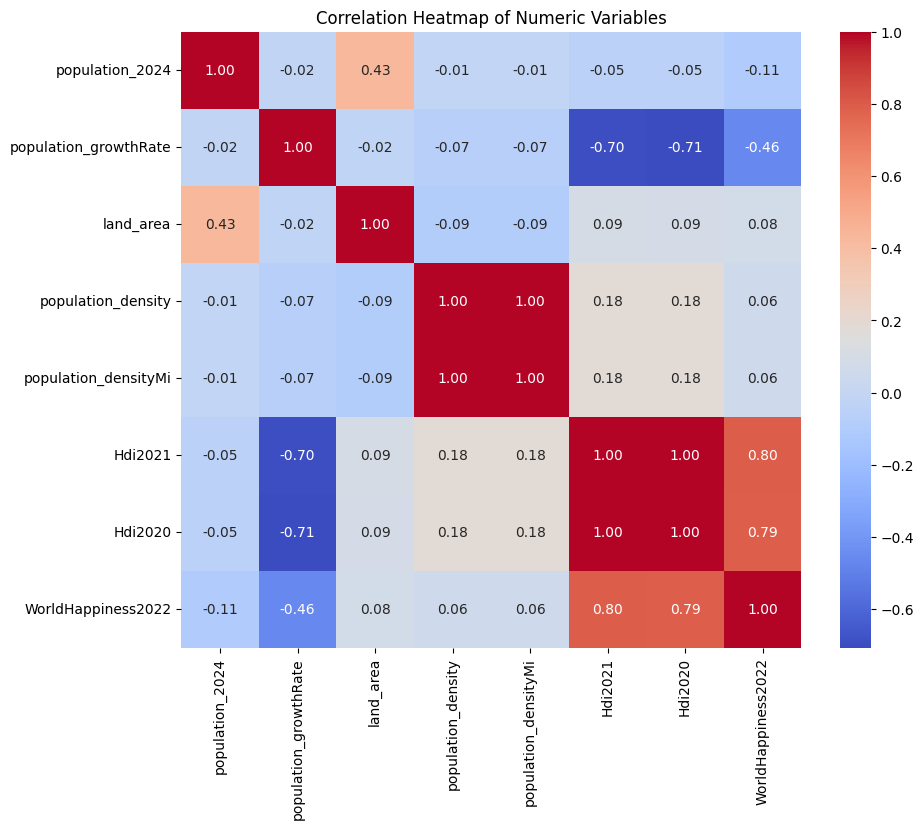

In [9]:
# Exclude non-numeric columns before calculating the correlation matrix
numeric_columns = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()

# Visualization using Matplotlib (Correlation Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


**What is the distribution of the Human Development Index (HDI) in 2021?**

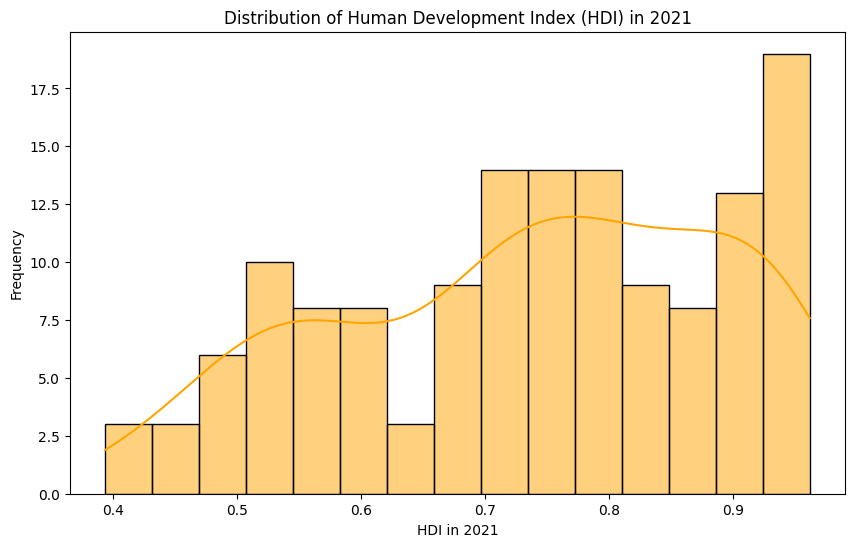

In [10]:
# Visualization using Matplotlib (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['Hdi2021'], bins=15, kde=True, color='orange')
plt.title('Distribution of Human Development Index (HDI) in 2021')
plt.xlabel('HDI in 2021')
plt.ylabel('Frequency')
plt.show()


**Can we visualize the geographical distribution of countries**

In [11]:
# Visualization using Plotly Express (Choropleth Map)
fig = px.choropleth(df, locations='country', locationmode='country names', color='population_2024',
                    hover_name='country', title='Geographical Distribution of Countries in 2024',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_geos(projection_type='natural earth')
fig.show()


**How does the population density correlate with the Happiness Index in 2022 across different regions?**

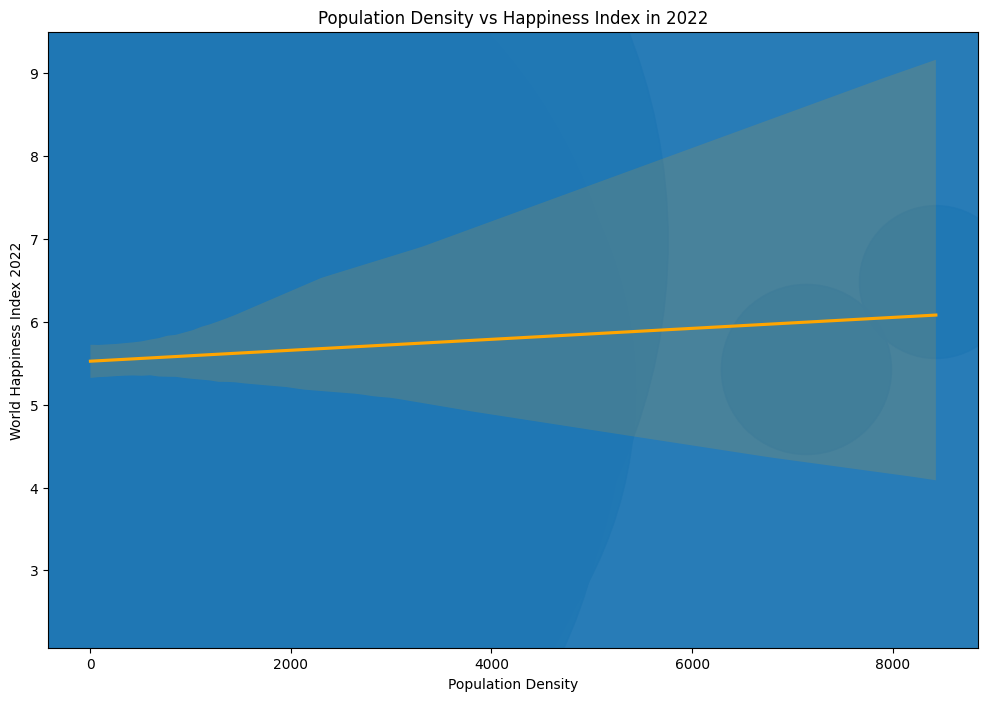

In [12]:
# Visualization using Seaborn (Scatter Plot with Regression)
plt.figure(figsize=(12, 8))
sns.regplot(x='population_density', y='WorldHappiness2022', data=df, scatter_kws={'s': df['population_2024']/500},
            line_kws={'color': 'orange'})
plt.title('Population Density vs Happiness Index in 2022')
plt.xlabel('Population Density')
plt.ylabel('World Happiness Index 2022')
plt.show()


**What is the relationship between the Human Development Index (HDI) in 2021 and the Happiness Index in 2022?**

In [13]:
# Visualization using Plotly Express (Bubble Chart)
fig = px.scatter(df, x='Hdi2021', y='WorldHappiness2022', color='region', size='population_2024',
                 hover_name='country', title='HDI vs Happiness Index in 2022')
fig.update_layout(xaxis_title='Human Development Index (HDI) in 2021',
                  yaxis_title='World Happiness Index in 2022')
fig.show()


**Can we explore the distribution of countries based on their UN membership status?**

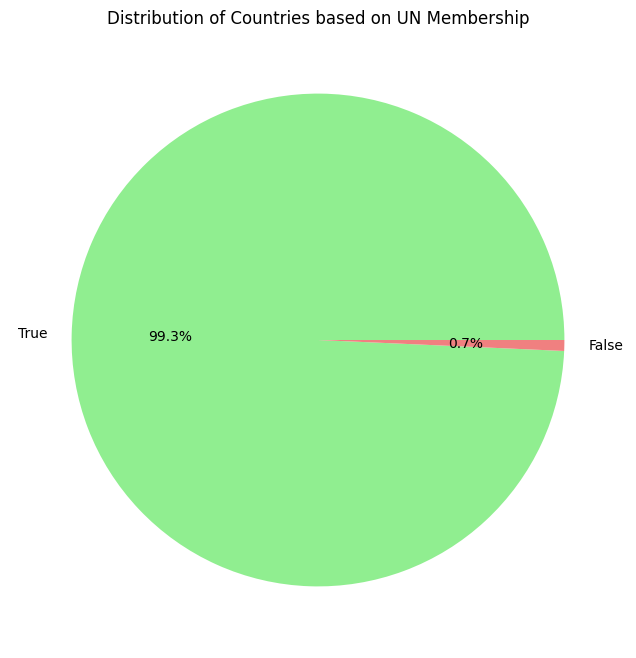

In [14]:
# Visualization using Matplotlib (Pie Chart)
un_member_counts = df['unMember'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(un_member_counts, labels=un_member_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Distribution of Countries based on UN Membership')
plt.show()


**How has the HDI changed from 2020 to 2021?**

In [15]:
# Visualization using Plotly Express (Bar Chart)
fig = px.bar(df, x='country', y=['Hdi2020', 'Hdi2021'], title='HDI Comparison (2020-2021)')
fig.update_layout(xaxis_title='Country', yaxis_title='Human Development Index (HDI)')
fig.show()


**What is the average population density in each region?**

In [16]:
# Visualization using Plotly Express (Bar Chart)
avg_population_density = df.groupby('region')['population_density'].mean().reset_index()
fig = px.bar(avg_population_density, x='region', y='population_density',
             title='Average Population Density Across Regions')
fig.update_layout(xaxis_title='Region', yaxis_title='Average Population Density')
fig.show()


**Explore the distribution of World Happiness Index in 2022 across different regions.**

In [17]:
# Visualization using Plotly Express (Box Plot)
fig = px.box(df, x='region', y='WorldHappiness2022', title='World Happiness Index Distribution in 2022 Across Regions')
fig.update_layout(xaxis_title='Region', yaxis_title='World Happiness Index 2022')
fig.show()


**How are the countries distributed based on their HDI in 2021 and Happiness Index in 2022?**

In [18]:
# Visualization using Plotly Express (3D Scatter Plot)
fig = px.scatter_3d(df, x='Hdi2021', y='WorldHappiness2022', z='population_density', color='region',
                    size='population_2024', hover_name='country',
                    title='HDI, Happiness Index, and Population Density (2021-2022)')
fig.update_layout(scene=dict(xaxis_title='HDI in 2021', yaxis_title='World Happiness Index in 2022',
                             zaxis_title='Population Density'))
fig.show()


**Explore the regional distribution of the top 5 countries with the highest Happiness Index in 2022.**

In [19]:
# Visualization using Plotly Express (Bar Chart)
top_happiness_countries = df.nlargest(5, 'WorldHappiness2022')
fig = px.bar(top_happiness_countries, x='country', y='WorldHappiness2022', color='region',
             title='Top 5 Countries with Highest Happiness Index in 2022')
fig.update_layout(xaxis_title='Country', yaxis_title='World Happiness Index 2022')
fig.show()


**How are the top 10 most populous countries distributed across regions?**

In [20]:
# Visualization using Plotly Express (Sunburst Chart)
top_10_populous_countries = df.nlargest(10, 'population_2024')
fig = px.sunburst(top_10_populous_countries, path=['region', 'country'], values='population_2024',
                  title='Top 10 Most Populous Countries Distributed Across Regions')
fig.show()


**Can we visualize the change in population growth rate from 2020 to 2021?**

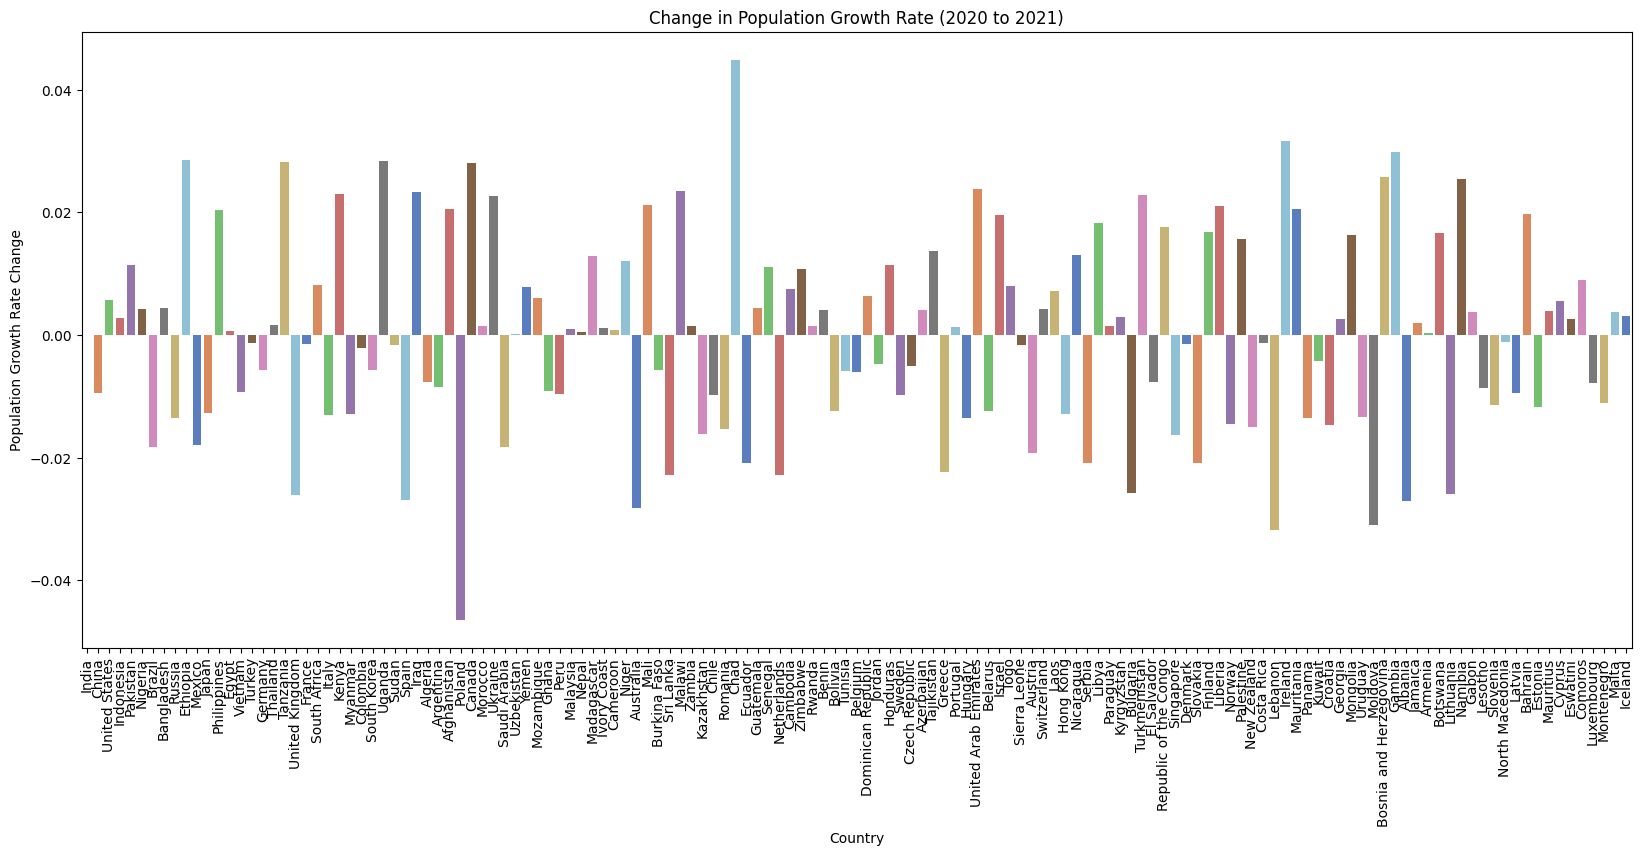

In [21]:
# Visualization using Matplotlib (Bar Chart)
plt.figure(figsize=(20, 8))
df['population_growth_change'] = df['population_growthRate'] - df['population_growthRate'].shift(1)
sns.barplot(x='country', y='population_growth_change', data=df, palette='muted')
plt.title('Change in Population Growth Rate (2020 to 2021)')
plt.xlabel('Country')
plt.ylabel('Population Growth Rate Change')
plt.xticks(rotation=90)
plt.show()


**Explore the distribution of countries based on HDI in 2021 and their respective population densities.**

In [22]:
# Visualization using Plotly Express (3D Scatter Plot)
fig = px.scatter_3d(df, x='Hdi2021', y='population_density', z='population_2024', color='region',
                    size='WorldHappiness2022', hover_name='country',
                    title='HDI, Population Density, and Happiness Index (2021-2022)')
fig.update_layout(scene=dict(xaxis_title='HDI in 2021', yaxis_title='Population Density',
                             zaxis_title='Population in 2024'))
fig.show()


**How does the share of borders correlate with land area?**

In [23]:
# Visualization using Plotly Express (Scatter Plot)
fig = px.scatter(df, x='land_area', y='share_borders', size='population_2024',
                 color='region', hover_name='country', title='Land Area vs Share of Borders')
fig.update_layout(xaxis_title='Land Area', yaxis_title='Share of Borders')
fig.show()


**Visualize the distribution of the Human Development Index (HDI) in 2021 across different regions using a violin plot.**

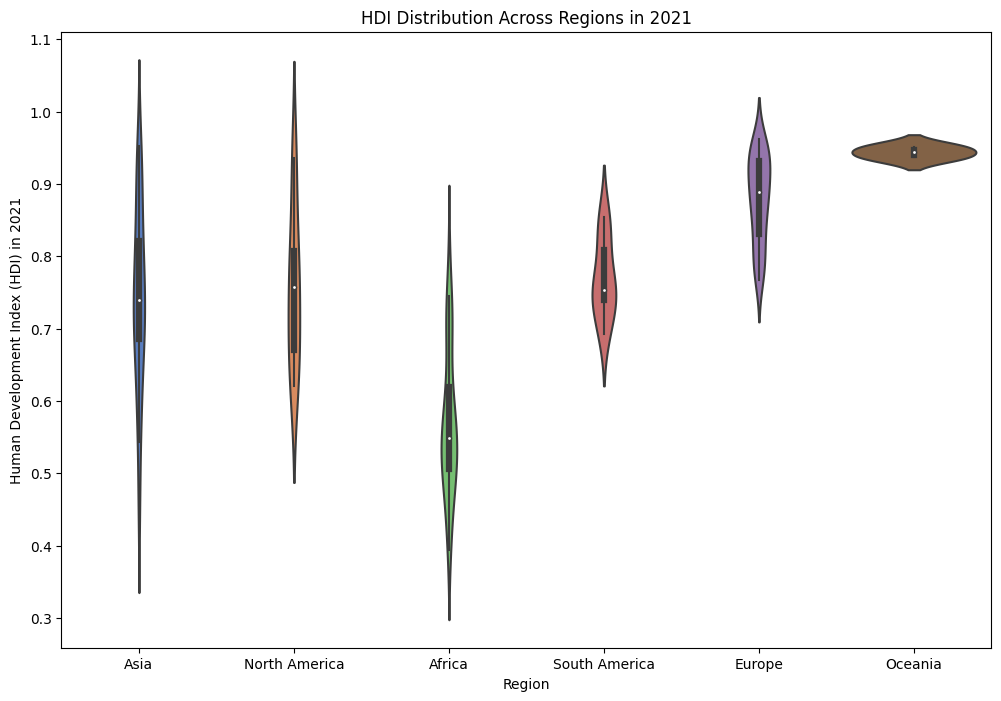

In [24]:
# Visualization using Seaborn (Violin Plot)
plt.figure(figsize=(12, 8))
sns.violinplot(x='region', y='Hdi2021', data=df, palette='muted')
plt.title('HDI Distribution Across Regions in 2021')
plt.xlabel('Region')
plt.ylabel('Human Development Index (HDI) in 2021')
plt.show()
